## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/CNN/external assignment/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as X_train:
     X_train.extractall() 
   

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip', 'r') as X_test:
  X_test.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as y_test:
  y_test.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip', 'r') as y_train:
  y_train.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
labels_train=pd.read_csv('/content/labels.csv')

In [0]:
train = pd.read_csv('/content/labels.csv')
train

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [0]:
labels_test=pd.read_csv('/content/sample_submission.csv')

In [0]:
labels_test.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

### Print the count of each category of Dogs given in the dataset



In [0]:
# name of columns
print ('Columns details :',labels_train.columns)

# count of unique breeds
print('\nNo of unique breeds : ',labels_train['breed'].nunique())

print('\ncount of each category of Dogs')
print(labels_train.groupby(by='breed').count())

Columns details : Index(['id', 'breed'], dtype='object')

No of unique breeds :  120

count of each category of Dogs
                                 id
breed                              
affenpinscher                    80
afghan_hound                    116
african_hunting_dog              86
airedale                        107
american_staffordshire_terrier   74
...                             ...
welsh_springer_spaniel           79
west_highland_white_terrier      81
whippet                          95
wire-haired_fox_terrier          82
yorkshire_terrier                82

[120 rows x 1 columns]


### Get one-hot encodings of labels

In [0]:
#One hot encoding. 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.utils import to_categorical

labels=labels_train.drop('breed',axis=1)
en_breed=LabelEncoder()

labels['breed']=en_breed.fit_transform(labels_train['breed'])
labels
# encoded classes
en_breed.classes_
encoded = pd.DataFrame(to_categorical(labels['breed']),columns=en_breed.classes_)
labels = pd.concat([labels,encoded], axis = 1)
labels
labels.drop('breed',axis=1,inplace=True)
labels.head()


Using TensorFlow backend.


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000bec180eb18c7604dcecc8fe0dba07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001513dfcb2ffafc82cccf4d8bbaba97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001cdf01b096e06d78e9e5112d419397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00214f311d5d2247d5dfe4fe24b2303d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0021f9ceb3235effd7fcde7f7538ed62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
# Read teh
train_img=labels['id']

In [0]:
from tqdm import tqdm
import cv2
img_rows=128
img_cols=128
x_train_data = []
i = 0 # initialisation
for f in tqdm(train_img.values): # f for format ,jpg
    img = cv2.imread('/content/train/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_train_data.append(img_resize)


100%|██████████| 10222/10222 [00:31<00:00, 324.27it/s]


In [0]:
import numpy as np
y_train_data=np.array(labels)
y_train_data[0]

array(['000bec180eb18c7604dcecc8fe0dba07', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object)

The image id is presently kept along with teh y_train label and will be removed after train test split. Required for later for transfer learning

In [0]:
# check xtrain
x_train_data[0]

array([[[ 69, 116, 173],
        [ 38,  91, 136],
        [102, 166, 204],
        ...,
        [130, 204, 237],
        [ 85, 193, 220],
        [ 59, 138, 170]],

       [[ 42,  77, 118],
        [142, 180, 216],
        [119, 162, 197],
        ...,
        [ 80, 152, 194],
        [101, 183, 218],
        [ 74, 177, 212]],

       [[ 65, 107, 151],
        [ 57, 103, 147],
        [ 66, 107, 153],
        ...,
        [ 37, 121, 172],
        [ 73, 145, 183],
        [ 64, 168, 207]],

       ...,

       [[ 77, 119, 190],
        [ 66, 121, 186],
        [ 66, 122, 183],
        ...,
        [ 70,  91, 159],
        [ 59,  89, 154],
        [ 91, 132, 184]],

       [[ 65, 118, 185],
        [ 72, 124, 190],
        [ 74, 125, 187],
        ...,
        [ 54,  63, 132],
        [ 74, 116, 169],
        [121, 169, 223]],

       [[ 63, 116, 183],
        [ 73, 125, 191],
        [ 76, 127, 190],
        ...,
        [ 50,  51, 127],
        [ 31,  62, 128],
        [ 90, 145, 198]]

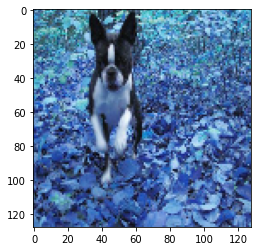

'boston_bull'

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train_data[0])
plt.show()
labels.columns[np.argmax(y_train_data[0,1:])+1]

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
np.shape(x_train_data)

(10222, 128, 128, 3)

In [0]:
np.max(x_train_data)

255

In [0]:
x_train_data=np.array(x_train_data)/255

In [0]:
x_train_data=np.reshape(x_train_data,(10222, 128, 128,3))
# check shape
x_train_data[0].shape

(128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
seed=0
x_train,x_val, y_train_labels, y_val_labels = train_test_split(x_train_data, y_train_data, test_size=0.25, random_state=seed) 
# Remove the id columns to form y val dataset
y_val=np.reshape(y_val_labels[:,1:],(2556,120)).astype(np.float32)
# Remove the id columns to form x val dataset
y_train=np.reshape(y_train_labels[:,1:],(7666,120)).astype(np.float32)
# make array containing the id of train and val set. It will used to preprocess the image during transfer learning.
y_train_id=np.array(y_train_labels[:,0])
y_val_id=np.array(y_val_labels[:,0])


In [0]:
np.shape(y_train)

(7666, 120)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img=labels_test['id']

Run the below code to load the test image files in x_test_feature

In [0]:
x_test= []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test.append(img_resize)

100%|██████████| 10357/10357 [00:31<00:00, 332.04it/s]


In [0]:
x_test[0]

array([[[ 67, 111, 104],
        [ 78,  98, 105],
        [ 67,  97,  94],
        ...,
        [  8,  56,  38],
        [ 10, 114, 101],
        [ 12, 101,  89]],

       [[ 32,  92,  86],
        [ 32,  75,  78],
        [ 62, 110, 110],
        ...,
        [  4,  88,  77],
        [  2,  89,  70],
        [  4, 111,  93]],

       [[ 31,  80,  73],
        [ 71, 110, 108],
        [ 81, 118, 122],
        ...,
        [ 13,  91,  69],
        [  0,  70,  47],
        [ 34, 149, 125]],

       ...,

       [[ 47,  87,  76],
        [ 39,  41,  37],
        [ 61,  97,  71],
        ...,
        [ 22,  42,  27],
        [ 22,  46,  23],
        [  5,  31,   7]],

       [[ 23,  44,  37],
        [116, 117, 118],
        [188, 204, 193],
        ...,
        [ 15,  30,  19],
        [ 25,  46,  24],
        [ 35,  60,  36]],

       [[ 11,  45,  13],
        [ 23,  56,  35],
        [  2,  28,   4],
        ...,
        [  1,  11,   3],
        [ 34,  58,  36],
        [ 20,  47,  23]]

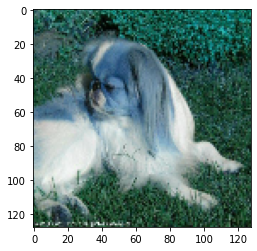

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
plt.show()


* we will not use the test data set in this excercise as labels are not provided for validation. Instead only split train data in train and validation set.

Normalize the test data and convert it into 4 dimensions

In [0]:
np.shape(x_test)

(10357, 128, 128, 3)

In [0]:
x_test=np.array(x_test)/255
x_test=np.reshape(x_test,(10357, 128, 128,3))
# check shape
x_test[0].shape

(128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,Conv2D,MaxPool2D,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import datetime

In [0]:
input_shape=(128,128,3)

In [0]:
def create_model():
  model=Sequential()

  model.add(Conv2D(64,(5,5),input_shape=input_shape)) 

  model.add(Conv2D(64,(3,3)))
  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(256))
  model.add(Activation('relu'))

  model.add(Dense(120))
  model.add(Activation('softmax'))

  # compile the model
  opt = Adam()
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

  #model summary
  model.summary()

  return model

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:

# Set network hyperparameters and the callback function
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping 
batch_size = 128
n_epochs = 10
patience=5

checkpoint = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vanilamodel_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=patience, verbose=1, mode='auto')
callbacks = [early,checkpoint]

In [0]:
model=create_model()
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, callbacks=callbacks,validation_data=(x_val,y_val)) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               60965120  
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               3

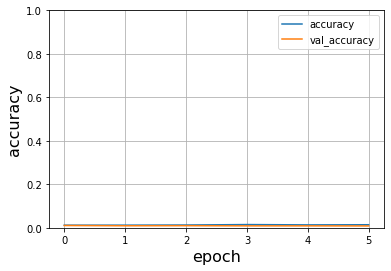

In [0]:
pd.DataFrame(hist.history)[['accuracy','val_accuracy']].plot()
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.ylim(0,1)
plt.grid()

In [0]:
model.load_weights("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vanilamodel_best.h5")
bst_val_acc_basic = max(hist.history['val_accuracy'])
print("Best val acc: {:.1%}".format(bst_val_acc_basic))

Best val acc: 1.1%


In [0]:
# print('Model Test Accuracy : {0:.2f}%'.format(model.evaluate(x_val,y_val)[1]*100))

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
# This will do preprocessing and realtime data augmentation:
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
val_datagen = ImageDataGenerator()    


### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator=train_datagen.flow(x=x_train,y=y_train,batch_size=batch_size)
val_generator=val_datagen.flow(x=x_val,y=y_val,batch_size=batch_size)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model=create_model()
checkpoint = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vanilamodel_image_augment_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
model.load_weights("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vanilamodel_best.h5")
histo=model.fit_generator(
                    train_generator,
                    steps_per_epoch=len(x_train)/batch_size,
                    epochs=n_epochs,
                    validation_data=val_generator,
                    validation_steps=len(x_val)/batch_size,callbacks=callbacks
                    )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 64)      4864      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               60965120  
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)              

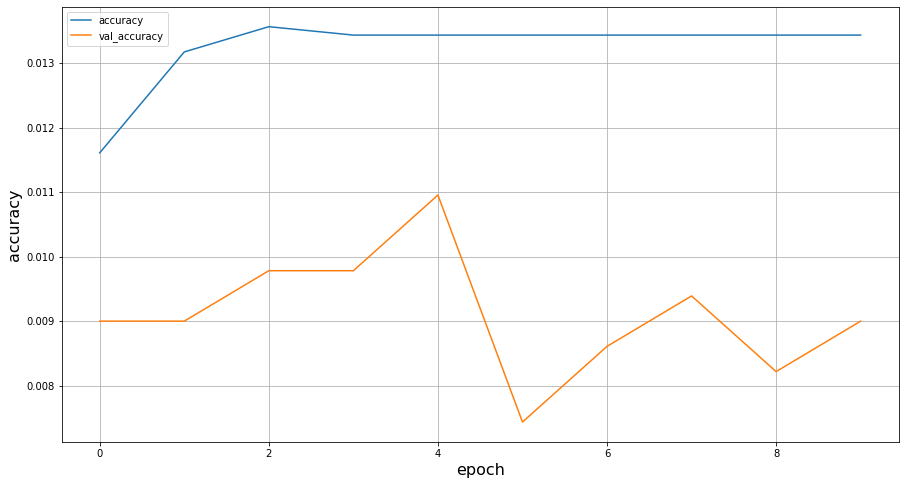

In [0]:
pd.DataFrame(histo.history)[['accuracy','val_accuracy']].plot()
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.grid()

In [0]:
bst_val_acc_image_aug = max(histo.history['val_accuracy'])
print("Best val acc: {:.1%}".format(bst_val_acc_image_aug))

Best val acc_01: 1.1%


In [0]:
# print('Test accuracy of MOdel trained with image agumentation : {0:0.2f}%'.format( model.evaluate(x_val,y_val)[1]*100))

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False,pooling='avg') #pooling='avg'

Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from tensorflow.keras.constraints import max_norm
x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu',kernel_constraint=max_norm(2.0))(x) #max constraint added for regularization
x=Dense(256,activation='relu',kernel_constraint=max_norm(2.0))(x)  #max layer constraint added for regularization
predictions = Dense(120, activation="softmax")(x)

In [0]:
# creating the final model 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
model_final00 = Model(inputs =base_model.input, outputs = predictions)



### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
    layer.trainable=False

In [0]:
model_final00.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
# compile the model 
optimizer=Adam(lr=0.001)
#optimizer = RMSprop(lr=0.001, rho=0.9)
model_final00.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])


In [0]:
# Data set has image of size 128*128 VGG accept image of size 224*224, hence we shall do image processing and normalization 
# we shall use the x_train_id and x_val_id set made before to ensure the same data set is used for train and validation
from tensorflow.keras.applications import imagenet_utils 
from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import img_to_array
INPUT_SIZE=224 # image size for VGG16 model
x_train = np.zeros((len(y_train_id), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
x_val = np.zeros((len(y_val_id), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
i=0
for f in tqdm(y_train_id): # x_train id from train test split used to create new x_train
    img = load_img('/content/train/{}.jpg'.format(f),target_size=(INPUT_SIZE,INPUT_SIZE))
    img=img_to_array(img)
    img=imagenet_utils.preprocess_input (np.expand_dims(img.copy(), axis=0))
    x_train[i]=img/255 # normalize the image
    i=i+1
    

i=0
for f in tqdm(y_val_id): # x_val id from train test split used to create new x_val
    img = load_img('/content/train/{}.jpg'.format(f),target_size=(INPUT_SIZE,INPUT_SIZE))
    img=img_to_array(img)
    img=imagenet_utils.preprocess_input (np.expand_dims(img.copy(), axis=0))
    x_val[i]=img/255 # normalize the image
    i=i+1

100%|██████████| 2556/2556 [00:13<00:00, 196.24it/s]


In [0]:
print('Shape of x_train : {0}\nShape of x_val : {1}'.format(np.shape(x_train),np.shape(x_val))) # check of x_value

Shape of x_train : (7666, 224, 224, 3)
Shape of x_val : (2556, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


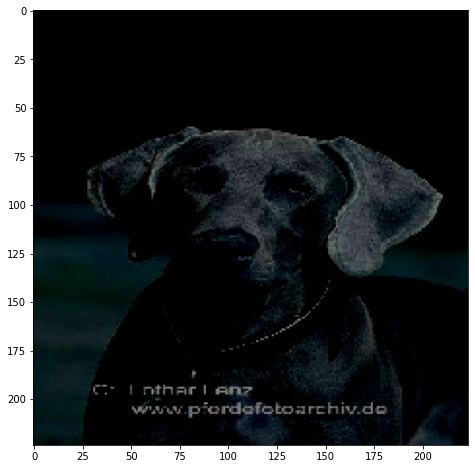

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [0]:
#Save the model
batch_size=128 
epochs=10
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping 
checkpoint = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=patience, verbose=1, mode='auto')

history=model_final00.fit(x_train, y_train, epochs = epochs, validation_data=(x_val, y_val), callbacks = [checkpoint, early],batch_size=batch_size)

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 4.7542 - accuracy: 0.0190
Epoch 00001: val_accuracy improved from -inf to 0.02856, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best.h5
60/60 [==============================] - 30s 493ms/step - loss: 4.7542 - accuracy: 0.0190 - val_loss: 4.6482 - val_accuracy: 0.0286
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 4.3999 - accuracy: 0.0556
Epoch 00002: val_accuracy improved from 0.02856 to 0.07942, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best.h5
60/60 [==============================] - 25s 410ms/step - loss: 4.3999 - accuracy: 0.0556 - val_loss: 4.1500 - val_accuracy: 0.0794
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 3.8280 - accuracy: 0.1227
Epoch 00003: val_accuracy improved from 0.07942 to 0.14085, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_bes

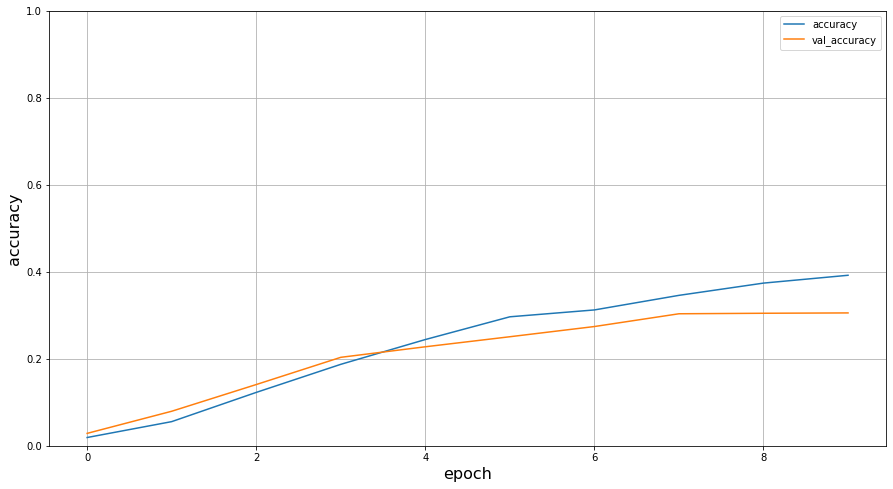

In [0]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.ylim(0,1)
plt.grid()

In [0]:
# since model has not reached overfit zone we contine to train for 50 more epochs with a early stop callback
epochs=50
history001=model_final00.fit(x_train, y_train, epochs = epochs, validation_data=(x_val, y_val), callbacks = [checkpoint, early],batch_size=batch_size,initial_epoch=10)

Epoch 11/50
60/60 [==============================] - ETA: 0s - loss: 2.2163 - accuracy: 0.4066
Epoch 00011: val_accuracy improved from 0.30556 to 0.32121, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best.h5
60/60 [==============================] - 24s 406ms/step - loss: 2.2163 - accuracy: 0.4066 - val_loss: 2.6161 - val_accuracy: 0.3212
Epoch 12/50
60/60 [==============================] - ETA: 0s - loss: 2.1623 - accuracy: 0.4198
Epoch 00012: val_accuracy did not improve from 0.32121
60/60 [==============================] - 24s 396ms/step - loss: 2.1623 - accuracy: 0.4198 - val_loss: 2.5580 - val_accuracy: 0.3146
Epoch 13/50
60/60 [==============================] - ETA: 0s - loss: 2.0852 - accuracy: 0.4405
Epoch 00013: val_accuracy improved from 0.32121 to 0.33412, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best.h5
60/60 [==============================] - 25s 409ms/step - loss: 2.0852 - accuracy: 0.440

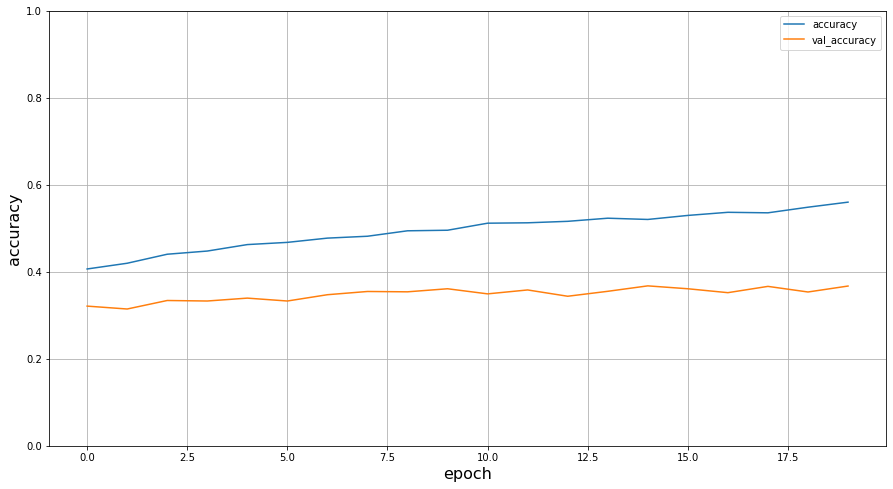

In [0]:
pd.DataFrame(history001.history)[['accuracy','val_accuracy']].plot()
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.ylim(0,1)
plt.grid()

In [0]:
bst_val_acc_VGG = max(history001.history['val_accuracy'])
print("Best val acc: {:.1%}".format(bst_val_acc_VGG))

Best val acc: 36.8%


In [0]:
# model reqularizatoin to reduce overfit 
# 50 epoch with early stopping to be used for hence forth for all iterations

In [0]:
from tensorflow.keras.constraints import max_norm
x=base_model.output
x=Flatten()(x)
x = BatchNormalization()(x)  # addittional layer added for regularization and faster convergence
x=Dropout(0.5)(x) # addittional layer added for regularization
x=Dense(1024,activation='relu',kernel_constraint=max_norm(2.0))(x) #
x = BatchNormalization()(x)  # addittional layer added for regularization and faster convergence
x=Dropout(0.5)(x)  # addittional layer added for regularization
x=Dense(256,activation='relu',kernel_constraint=max_norm(2.0))(x) #,kernel_constraint=max_norm(3.0)
#x = BatchNormalization()(x)
x=Dropout(0.3)(x)  # addittional layer added for regularization
predictions = Dense(120, activation="softmax")(x)

In [0]:
# creating the final model 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
model_final = Model(inputs =base_model.input, outputs = predictions)

In [0]:
# compile the model 
optimizer=Adam(lr=0.001)
#optimizer = RMSprop(lr=0.001, rho=0.9)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])


In [0]:
checkpoint = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_reg.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
history01=model_final.fit(x_train, y_train, epochs = epochs, validation_data=(x_val, y_val), callbacks = [checkpoint, early],batch_size=batch_size)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 5.3569 - accuracy: 0.0312
Epoch 00001: val_accuracy improved from -inf to 0.04617, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_reg.h5
60/60 [==============================] - 25s 413ms/step - loss: 5.3569 - accuracy: 0.0312 - val_loss: 4.6801 - val_accuracy: 0.0462
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 4.3504 - accuracy: 0.0947
Epoch 00002: val_accuracy improved from 0.04617 to 0.10798, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_reg.h5
60/60 [==============================] - 25s 413ms/step - loss: 4.3504 - accuracy: 0.0947 - val_loss: 4.4535 - val_accuracy: 0.1080
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 3.8300 - accuracy: 0.1487
Epoch 00003: val_accuracy improved from 0.10798 to 0.11854, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/v

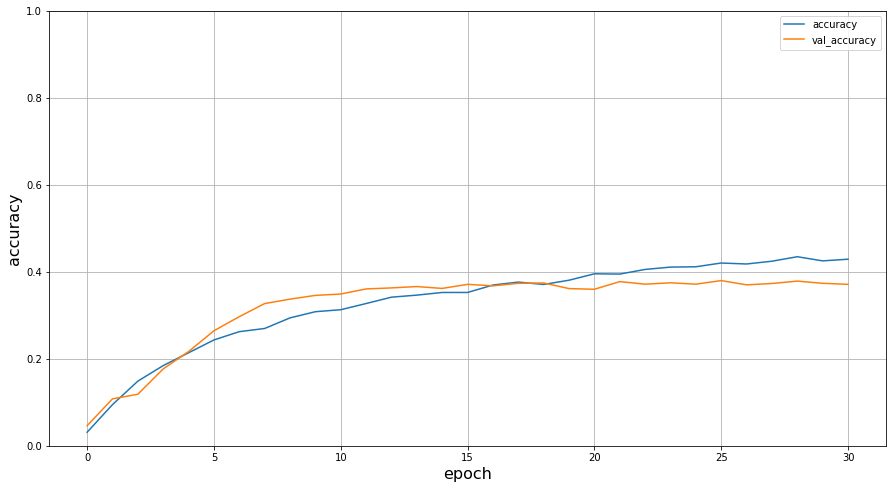

In [0]:
pd.DataFrame(history01.history)[['accuracy','val_accuracy']].plot()
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.ylim(0,1)
plt.grid()

In [0]:
bst_val_acc_reg = max(history01.history['val_accuracy'])
print("Best val acc_reg: {:.1%}".format(bst_val_acc_reg))

Best val acc_reg: 38.0%


The model accuracy improved from 1.96% to 37.6 percent but not sufficient, we shall further try to improve the accuracy by finetunig the last two layer of the VGG16 as trainable.Overfitting significantly reduce due to regularization

In [0]:
model_final_v1=model_final

In [0]:
model_final_v1.trainable = True

set_trainable = False
for layer in model_final_v1.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in model_final_v1.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_1,False
1,<tensorflow.python.keras.layers.convolutional....,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional....,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPoo...,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional....,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional....,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPoo...,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional....,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional....,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional....,block3_conv3,False


In [0]:
# compile the model 
optimizer=SGD(lr=0.0001, momentum=0.9) # very small learning rate since fine tuning
#optimizer=RMSprop(lr=1e-4)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
# load of the previous model iteration used for further optimization with two layers made tainable
model_final_v1.load_weights("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_reg.h5")


In [0]:
#Save the model
batch_size=128 
epochs=50
checkpoint = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_2layerstrainable.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=patience, verbose=1, mode='auto')

history2=model_final_v1.fit(x_train, y_train, epochs = epochs, validation_data=(x_val, y_val), callbacks = [checkpoint, early],batch_size=batch_size)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 1.9129 - accuracy: 0.4764
Epoch 00001: val_accuracy improved from -inf to 0.43388, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_2layerstrainable.h5
60/60 [==============================] - 34s 574ms/step - loss: 1.9129 - accuracy: 0.4764 - val_loss: 2.0788 - val_accuracy: 0.4339
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 1.7732 - accuracy: 0.5072
Epoch 00002: val_accuracy improved from 0.43388 to 0.45736, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_2layerstrainable.h5
60/60 [==============================] - 32s 535ms/step - loss: 1.7732 - accuracy: 0.5072 - val_loss: 1.9978 - val_accuracy: 0.4574
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 1.6957 - accuracy: 0.5188
Epoch 00003: val_accuracy improved from 0.45736 to 0.46518, saving model to /content/drive/My Drive/Colab Notebooks

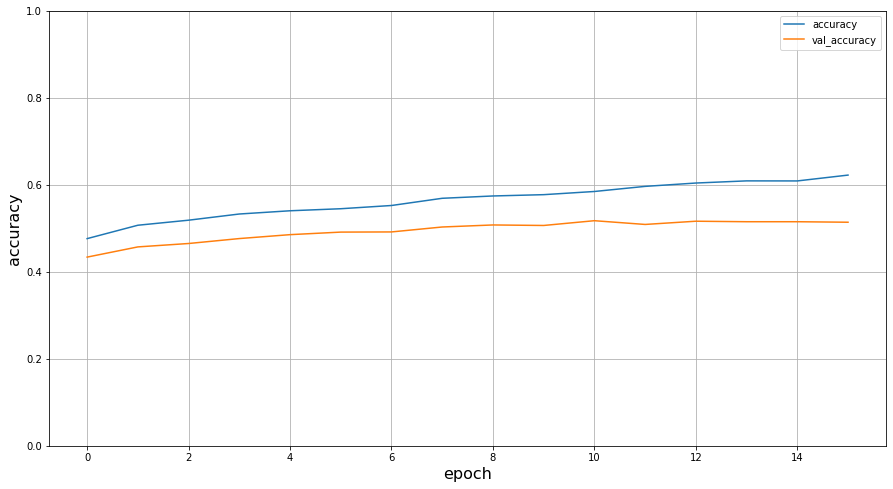

In [0]:
pd.DataFrame(history2.history)[['accuracy','val_accuracy']].plot()
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.ylim(0,1)
plt.grid()

In [0]:
bst_val_acc_2 = max(history2.history['val_accuracy'])
print("Best val acc: {:.1%}".format(bst_val_acc_2))

Best val acc: 51.8%


Signs of mild overfit is seen in the comparision of training accuracy plot . 
We shall try image agumentation to improve accuracy and reduce overfitting



In [0]:
# weigth of previous iteration are used for further tuning.
model_final_v1.load_weights("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_2layerstrainable.h5")


In [0]:
#Save the model
batch_size=128 
patience=10
checkpoint = ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_1LAYERSOUT_image agumentation.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=patience, verbose=1, mode='auto')


epochs=50

#Train the model
history3=model_final_v1.fit_generator(
                                        train_generator,
                                        steps_per_epoch=len(x_train)/batch_size,
                                        epochs=epochs,
                                        validation_data=val_generator,
                                        validation_steps=len(x_val)/batch_size, callbacks = [checkpoint, early]
                                      )


Epoch 1/50
60/59 [==============================] - ETA: 0s - loss: 3.5166 - accuracy: 0.2308
Epoch 00001: val_accuracy improved from -inf to 0.37167, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_1LAYERSOUT_image agumentation.h5
60/59 [==============================] - 34s 560ms/step - loss: 3.5166 - accuracy: 0.2308 - val_loss: 2.6978 - val_accuracy: 0.3717
Epoch 2/50
60/59 [==============================] - ETA: 0s - loss: 3.2827 - accuracy: 0.2519
Epoch 00002: val_accuracy improved from 0.37167 to 0.38146, saving model to /content/drive/My Drive/Colab Notebooks/CNN/external assignment/vgg16_best_1LAYERSOUT_image agumentation.h5
60/59 [==============================] - 33s 542ms/step - loss: 3.2827 - accuracy: 0.2519 - val_loss: 2.5587 - val_accuracy: 0.3815
Epoch 3/50
60/59 [==============================] - ETA: 0s - loss: 3.1774 - accuracy: 0.2636
Epoch 00003: val_accuracy improved from 0.38146 to 0.39789, saving model to /content/driv

In [0]:
bst_val_acc_3 = max(history3.history['val_accuracy'])
print("Best val acc: {:.1%}".format(bst_val_acc_3))

Best val acc: 48.8%


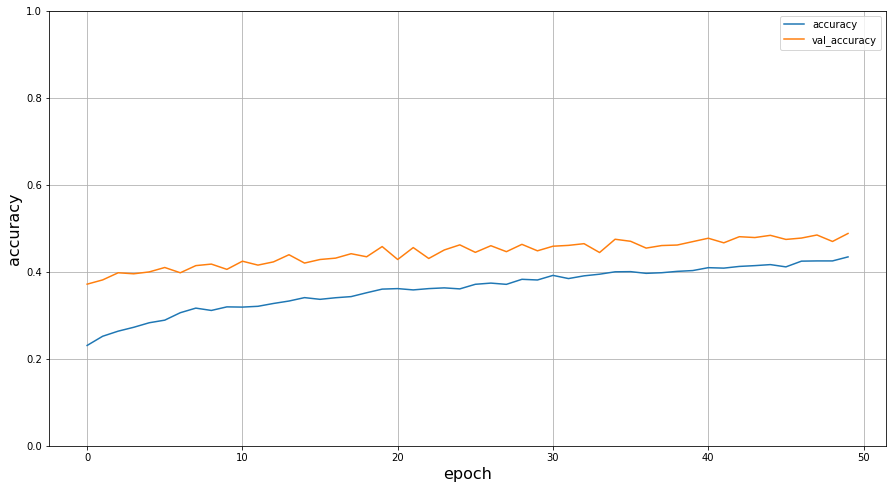

In [0]:
pd.DataFrame(history3.history)[['accuracy','val_accuracy']].plot()
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.ylim(0,1)
plt.grid()

In [0]:
Trial=['Base_CNN','Image_Aug_CNN','VGG16_CNN','VGG16_Regularized_CNN','VGG16_Fine_tune_CNN','VGG16_finetuned_image_aug']
Value=[bst_val_acc_basic,bst_val_acc_image_aug,bst_val_acc_VGG,bst_val_acc_reg,bst_val_acc_2,bst_val_acc_3]

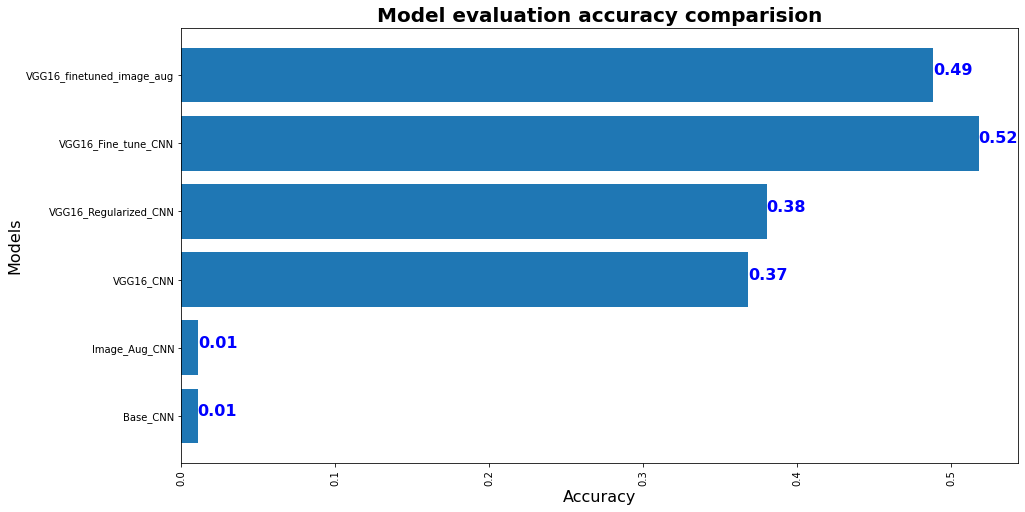

In [0]:
plt.barh(Trial,Value)
plt.title('Model evaluation accuracy comparision',fontweight='bold',fontsize=20)
plt.ylabel('Models',fontsize=16)
plt.xlabel('Accuracy',fontsize=16)
plt.xticks(rotation=90)
for i, v in enumerate(Value):
    plt.text(v , i ,'{0:0.2f}'.format(v), color='blue', fontweight='bold',fontsize=16)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


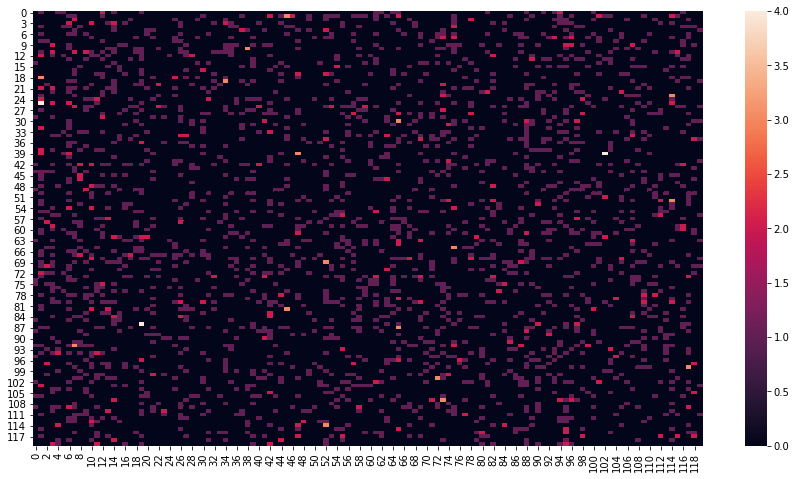

In [0]:
# Confusion matrix for Acutal vs Predicted labels
predict=model_final_v1.predict(val_generator,steps=len(x_val)/batch_size) 
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix([np.argmax(y_val[i]) for i in np.arange(len(y_val))],[np.argmax(predict[i]) for i in np.arange(len(predict))]))

* Diaganol line (left to rigth donwards) is not seens due to classificaiton accuracy of 49% with 120 class.

# Summary
* Simple CNN architecture with and without image agumentation lead to very poor result of classfication accuracy less than 2%,
* simple CNN architecture with transfer learning (VGG16) lead to  37% accuracy but higher overfit was observed
*CNN architecture with transfer learning and regularization lead to  38% accuracy and minimal overfit.(effect of dorpouts and bathc normalization layer)
* CNN architecture with transfer learning,regularization, fine tuning last two layer of VGG16 and image agumentation led to  49% accuracy with 50 epoch with no early stop. There is a possibility to ahieve higher accuracy with more epochs and has better resistance to over fit(presently only case with train error > test errror upto 50 epochs)
* 52% accuracy could be achieved by implementing CNN architecture with transfer learning  and tine tuning last two layer of VGG16.
* Significanlt improvement in classifcaiton accuracy could be achieved by using transfer learning , however it was not possible to improve beyond 52%.
* The lower acccuracy of the prediction can be attributted to large number of classificaiton labels(120), similar feature of different dog breed,also limitation of architecture used. It should be possible to imporve the accuracy further by using more advanced trained architecture such as Resnet and Xception.
It could be done due to memory limiation for the given sample size.






